<a href="https://colab.research.google.com/github/sujiDuddaiyan/GLM/blob/main/Copy_of_GLM_text_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
sentences = ["Kerala Reels Under Massive Landslides Death Toll Mounts",
"Rescue Operations Intensify as Kerala Battles Floods and Landslides",
"Kerala CM Pinarayi Vijayan Announces Relief Measures for Landslide Victims",
"Army, Navy Join Rescue Efforts in Kerala's Disaster-Hit Districts",
"Kerala Braces for More Rain as Landslide Threat Looms Large",
"Heart-Wrenching Stories Emerge from Kerala Landslide Tragedy",
"Kerala Government Seeks Central Assistance to Tackle Crisis",
"Climate Change Impact Experts Warn of Increased Landslide Risk in Kerala"]

In [ ]:
#jaccard similarity measure
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

In [ ]:
sentences = ["Kerala Reels Under Massive Landslides Death Toll Mounts",
"Rescue Operations Intensify as Kerala Battles Floods and Landslides",
"Kerala CM Pinarayi Vijayan Announces Relief Measures for Landslide Victims",
"Army, Navy Join Rescue Efforts in Kerala's Disaster-Hit Districts",
"Kerala Braces for More Rain as Landslide Threat Looms Large",
"Heart-Wrenching Stories Emerge from Kerala Landslide Tragedy",
"Kerala Government Seeks Central Assistance to Tackle Crisis",
"Climate Change Impact Experts Warn of Increased Landslide Risk in Kerala"]
sentences = [sent.lower().split(" ") for sent in sentences]
jaccard_similarity(sentences[0], sentences[1])

0.13333333333333333

In [ ]:
#euclidean distance
from math import sqrt, pow, exp

def squared_sum(x):
  """ return 3 rounded square rooted value """

  return round(sqrt(sum([a*a for a in x])),3)

def euclidean_distance(x,y):
  """ return euclidean distance between two lists """

  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

# Correctly process each sentence individually
embeddings = [nlp(sentence).vector for sentence in ["Kerala Reels Under Massive Landslides Death Toll Mounts",
"Rescue Operations Intensify as Kerala Battles Floods and Landslides",
"Kerala CM Pinarayi Vijayan Announces Relief Measures for Landslide Victims",
"Army, Navy Join Rescue Efforts in Kerala's Disaster-Hit Districts",
"Kerala Braces for More Rain as Landslide Threat Looms Large",
"Heart-Wrenching Stories Emerge from Kerala Landslide Tragedy",
"Kerala Government Seeks Central Assistance to Tackle Crisis",
"Climate Change Impact Experts Warn of Increased Landslide Risk in Kerala"]]

distance = euclidean_distance(embeddings[0], embeddings[1])
print(distance)

3.167834300771161


In [ ]:
def distance_to_similarity(distance):
  return 1/exp(distance)

distance_to_similarity(distance)

0.04209466363793555

In [ ]:
#bag of words
from collections import Counter
corpus = " ".join(["Kerala Reels Under Massive Landslides Death Toll Mounts",
"Rescue Operations Intensify as Kerala Battles Floods and Landslides",
"Kerala CM Pinarayi Vijayan Announces Relief Measures for Landslide Victims",
"Army, Navy Join Rescue Efforts in Kerala's Disaster-Hit Districts",
"Kerala Braces for More Rain as Landslide Threat Looms Large",
"Heart-Wrenching Stories Emerge from Kerala Landslide Tragedy",
"Kerala Government Seeks Central Assistance to Tackle Crisis",
"Climate Change Impact Experts Warn of Increased Landslide Risk in Kerala"])
words = corpus.lower().split()
bag_of_words = Counter(words)
print(bag_of_words)

Counter({'kerala': 7, 'landslide': 4, 'landslides': 2, 'rescue': 2, 'as': 2, 'for': 2, 'in': 2, 'reels': 1, 'under': 1, 'massive': 1, 'death': 1, 'toll': 1, 'mounts': 1, 'operations': 1, 'intensify': 1, 'battles': 1, 'floods': 1, 'and': 1, 'cm': 1, 'pinarayi': 1, 'vijayan': 1, 'announces': 1, 'relief': 1, 'measures': 1, 'victims': 1, 'army,': 1, 'navy': 1, 'join': 1, 'efforts': 1, "kerala's": 1, 'disaster-hit': 1, 'districts': 1, 'braces': 1, 'more': 1, 'rain': 1, 'threat': 1, 'looms': 1, 'large': 1, 'heart-wrenching': 1, 'stories': 1, 'emerge': 1, 'from': 1, 'tragedy': 1, 'government': 1, 'seeks': 1, 'central': 1, 'assistance': 1, 'to': 1, 'tackle': 1, 'crisis': 1, 'climate': 1, 'change': 1, 'impact': 1, 'experts': 1, 'warn': 1, 'of': 1, 'increased': 1, 'risk': 1})


In [ ]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(["Kerala Reels Under Massive Landslides Death Toll Mounts",
"Rescue Operations Intensify as Kerala Battles Floods and Landslides",
"Kerala CM Pinarayi Vijayan Announces Relief Measures for Landslide Victims",
"Army, Navy Join Rescue Efforts in Kerala's Disaster-Hit Districts",
"Kerala Braces for More Rain as Landslide Threat Looms Large",
"Heart-Wrenching Stories Emerge from Kerala Landslide Tragedy",
"Kerala Government Seeks Central Assistance to Tackle Crisis",
"Climate Change Impact Experts Warn of Increased Landslide Risk in Kerala"])
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'announces' 'army' 'as' 'assistance' 'battles' 'braces' 'central'
 'change' 'climate' 'cm' 'crisis' 'death' 'disaster' 'districts' 'efforts'
 'emerge' 'experts' 'floods' 'for' 'from' 'government' 'heart' 'hit'
 'impact' 'in' 'increased' 'intensify' 'join' 'kerala' 'landslide'
 'landslides' 'large' 'looms' 'massive' 'measures' 'more' 'mounts' 'navy'
 'of' 'operations' 'pinarayi' 'rain' 'reels' 'relief' 'rescue' 'risk'
 'seeks' 'stories' 'tackle' 'threat' 'to' 'toll' 'tragedy' 'under'
 'victims' 'vijayan' 'warn' 'wrenching']
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
  0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
  0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 1

In [ ]:
#Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["Kerala Reels Under Massive Landslides Death Toll Mounts",
"Rescue Operations Intensify as Kerala Battles Floods and Landslides",
"Kerala CM Pinarayi Vijayan Announces Relief Measures for Landslide Victims",
"Army, Navy Join Rescue Efforts in Kerala's Disaster-Hit Districts",
"Kerala Braces for More Rain as Landslide Threat Looms Large",
"Heart-Wrenching Stories Emerge from Kerala Landslide Tragedy",
"Kerala Government Seeks Central Assistance to Tackle Crisis",
"Climate Change Impact Experts Warn of Increased Landslide Risk in Kerala"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'announces' 'army' 'as' 'assistance' 'battles' 'braces' 'central'
 'change' 'climate' 'cm' 'crisis' 'death' 'disaster' 'districts' 'efforts'
 'emerge' 'experts' 'floods' 'for' 'from' 'government' 'heart' 'hit'
 'impact' 'in' 'increased' 'intensify' 'join' 'kerala' 'landslide'
 'landslides' 'large' 'looms' 'massive' 'measures' 'more' 'mounts' 'navy'
 'of' 'operations' 'pinarayi' 'rain' 'reels' 'relief' 'rescue' 'risk'
 'seeks' 'stories' 'tackle' 'threat' 'to' 'toll' 'tragedy' 'under'
 'victims' 'vijayan' 'warn' 'wrenching']
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.38175019 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.15245143
  0.         0.31993645 0.         0.         0.38175019 0.
  0.         0.38175019 0.         0.         0.         0.
  0.         0.38175019 0.         0

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Step 1: Install gensim
!pip install gensim

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Assuming 'sentences' is a list of strings (not tokenized)
# For example:
sentences = ["Kerala Reels Under Massive Landslides Death Toll Mounts",
"Rescue Operations Intensify as Kerala Battles Floods and Landslides",
"Kerala CM Pinarayi Vijayan Announces Relief Measures for Landslide Victims",
"Army, Navy Join Rescue Efforts in Kerala's Disaster-Hit Districts",
"Kerala Braces for More Rain as Landslide Threat Looms Large",
"Heart-Wrenching Stories Emerge from Kerala Landslide Tragedy",
"Kerala Government Seeks Central Assistance to Tackle Crisis",
"Climate Change Impact Experts Warn of Increased Landslide Risk in Kerala"]

docs = list(nlp.pipe(sentences))

print(docs)

[Kerala Reels Under Massive Landslides Death Toll Mounts, Rescue Operations Intensify as Kerala Battles Floods and Landslides, Kerala CM Pinarayi Vijayan Announces Relief Measures for Landslide Victims, Army, Navy Join Rescue Efforts in Kerala's Disaster-Hit Districts, Kerala Braces for More Rain as Landslide Threat Looms Large, Heart-Wrenching Stories Emerge from Kerala Landslide Tragedy, Kerala Government Seeks Central Assistance to Tackle Crisis, Climate Change Impact Experts Warn of Increased Landslide Risk in Kerala]


In [ ]:
print(docs[0].vector)

[-2.5647080e-01 -4.8478627e-01 -1.9700864e-01  7.0730507e-01
  3.2927501e-01 -2.7212623e-01  5.4348445e-01  8.5415709e-01
  3.3992533e-02 -3.5561547e-03  5.8111674e-01  8.6154193e-01
 -1.2231843e+00 -1.3883498e+00 -7.0280302e-01 -1.8835461e-01
 -1.4360577e-01  6.6609010e-03 -2.0822442e-01 -6.4365423e-01
 -7.7404583e-01 -6.9962424e-01  4.2696238e-02  8.1209671e-01
  1.6697498e-01  1.3646424e-01  7.3278856e-01  3.1000185e-01
  3.7128600e-01  6.6700447e-01 -3.0987453e-01 -4.0697110e-01
 -5.4727173e-01  6.9726968e-01 -6.7725849e-01 -3.4905642e-02
  8.4564269e-01  3.5389653e-01 -3.4522036e-01 -8.9078903e-01
 -1.0330305e+00  2.8938666e-02 -3.8326254e-01  5.9843695e-01
 -4.5409811e-01  2.2522856e-01 -2.3150964e-01  1.8085907e-01
  4.3360159e-02 -2.5391662e-01 -6.7627919e-01  5.5501258e-01
  5.4137987e-01 -3.7850302e-01 -1.0071119e+00 -6.0257006e-02
  2.1787637e-01 -4.3307763e-01  7.9196537e-01  7.7379234e-02
 -2.2926503e-01 -7.2655094e-01 -1.7390010e-01 -6.7330271e-01
 -1.9195653e-01 -3.06576

In [ ]:
#cosine similarity
def cos_similarity(x,y):
  """ return cosine similarity between two lists """

  numerator = sum(a*b for a,b in zip(x,y))
  denominator = squared_sum(x)*squared_sum(y)
  return round(numerator/float(denominator),3)

cos_similarity(embeddings[0], embeddings[1])

0.833

In [ ]:
!pip install nltk
!pip install gensim
import nltk
nltk.download('punkt') # Download the necessary data for word tokenization
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample sentences
sentences = [
    "Kerala Reels Under Massive Landslides Death Toll Mounts",
    "Rescue Operations Intensify as Kerala Battles Floods and Landslides",
    "Kerala CM Pinarayi Vijayan Announces Relief Measures for Landslide Victims",
    "Army, Navy Join Rescue Efforts in Kerala's Disaster-Hit Districts",
    "Kerala Braces for More Rain as Landslide Threat Looms Large",
    "Heart-Wrenching Stories Emerge from Kerala Landslide Tragedy",
    "Kerala Government Seeks Central Assistance to Tackle Crisis",
    "Climate Change Impact Experts Warn of Increased Landslide Risk in Kerala"
]

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors for all unique words
word_vectors = [model.wv[word] for word in model.wv.index_to_key]






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

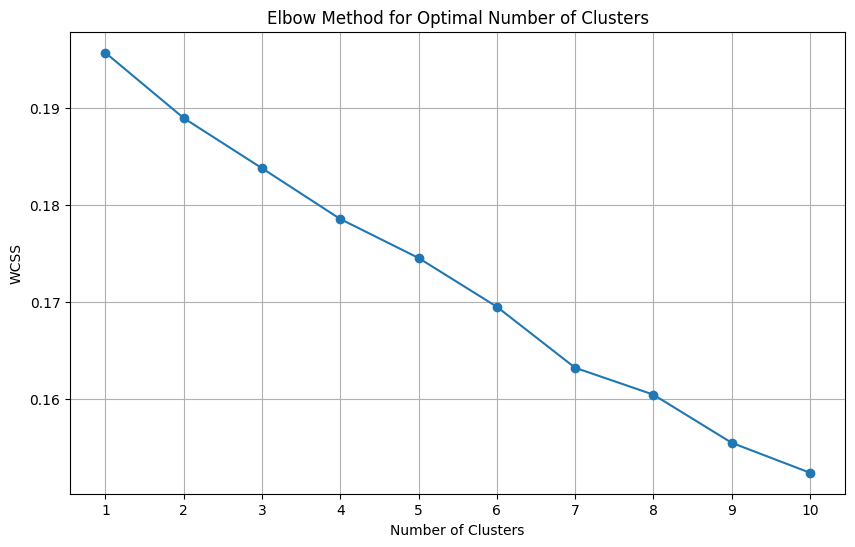

In [ ]:
wcss = []
max_clusters = 10  # Maximum number of clusters to consider

for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(word_vectors)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Calculate WCSS and silhouette score for different numbers of clusters
num_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(word_vectors)

# Calculate WCSS
wcss = kmeans.inertia_

# Calculate silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(word_vectors, labels)

# Print WCSS and silhouette score
print(f"Number of clusters: {num_clusters}")
print(f"WCSS: {wcss}")
print(f"Silhouette Score: {silhouette_avg}")

Number of clusters: 3
WCSS: 0.18376170612286358
Silhouette Score: 0.013061143457889557


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


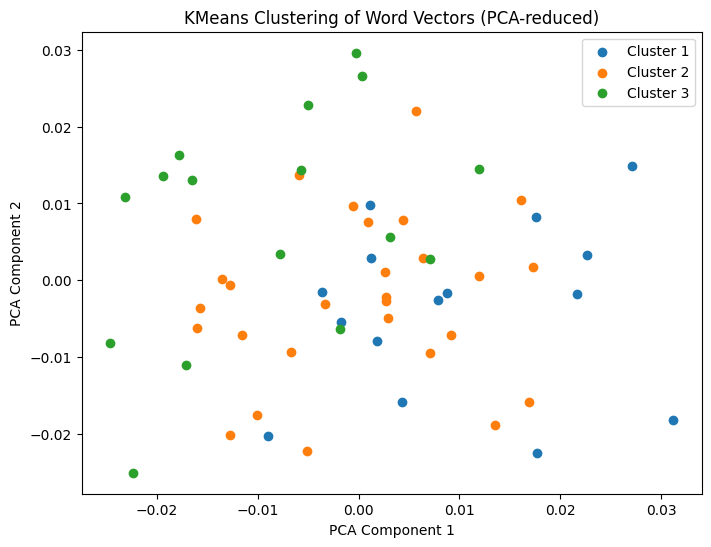

Cluster 1: ['kerala', 'victims', 'change', 'measures', 'pinarayi', 'intensify', 'warn', 'massive', 'army', ',', 'navy', 'heart-wrenching', 'from', 'emerge', 'districts']
Cluster 2: ['landslide', 'landslides', 'rescue', 'for', 'climate', 'crisis', 'impact', 'announces', 'vijayan', 'cm', 'and', 'floods', 'battles', 'death', 'under', 'reels', 'tackle', 'to', 'central', 'tragedy', 'stories', 'large', 'looms', 'threat', 'more', "'s", 'efforts', 'risk']
Cluster 3: ['as', 'in', 'relief', 'experts', 'operations', 'mounts', 'toll', 'of', 'assistance', 'seeks', 'government', 'join', 'rain', 'braces', 'disaster-hit', 'increased']


In [ ]:
# Determine the optimal number of clusters (e.g., 3 based on the elbow curve)
optimal_clusters = 3

# Step 4: Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(word_vectors)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    plt.scatter(word_vectors_pca[labels == i, 0], word_vectors_pca[labels == i, 1], label=f'Cluster {i+1}')
plt.title('KMeans Clustering of Word Vectors (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Print the clustered words for each cluster
for i in range(optimal_clusters):
    cluster_words = [model.wv.index_to_key[j] for j in range(len(labels)) if labels[j] == i]
    print(f"Cluster {i+1}: {cluster_words}")